In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from wordcloud import WordCloud

In [39]:
### Define the path to the file (a string in a variable 'db_file')
# if the data directory label is at the same level as the notebook,
# then the path is 'data/peace_import_auto.db'
db_file_address = '../data/peace_import_auto.db'

In [40]:
# Connexion à la base de données
try:
    cn = sql.connect(db_file_address)
    print("Connexion à la base de données réussie.")
except Exception as e:
    # En cas d'échec de la connexion
    print("Erreur lors de la connexion à la base de données :", e)
    raise


Connexion à la base de données réussie.


In [41]:
# Requête SQL pour extraire les occupations
def get_data():
    query = """
SELECT name, COUNT(*) as occurrence
FROM dbp_occupation
GROUP BY name
ORDER BY occurrence DESC
"""

In [42]:
# Exécuter la requête et charger les données dans un DataFrame
df = pd.read_sql_query(query, cn)
cn.close()

In [43]:
# Inspecter les premières lignes des données
print("Occupations des militants pacifistes :")
print(df)

Occupations des militants pacifistes :
                 name  occurrence
0      Peace activist          15
1            Activist          11
2            Pacifist          10
3          Journalist           5
4              Author           4
..                ...         ...
75      Archaeologist           1
76     Anthropologist           1
77         Ambassador           1
78  Alpha Kappa Alpha           1
79              Actor           1

[80 rows x 2 columns]


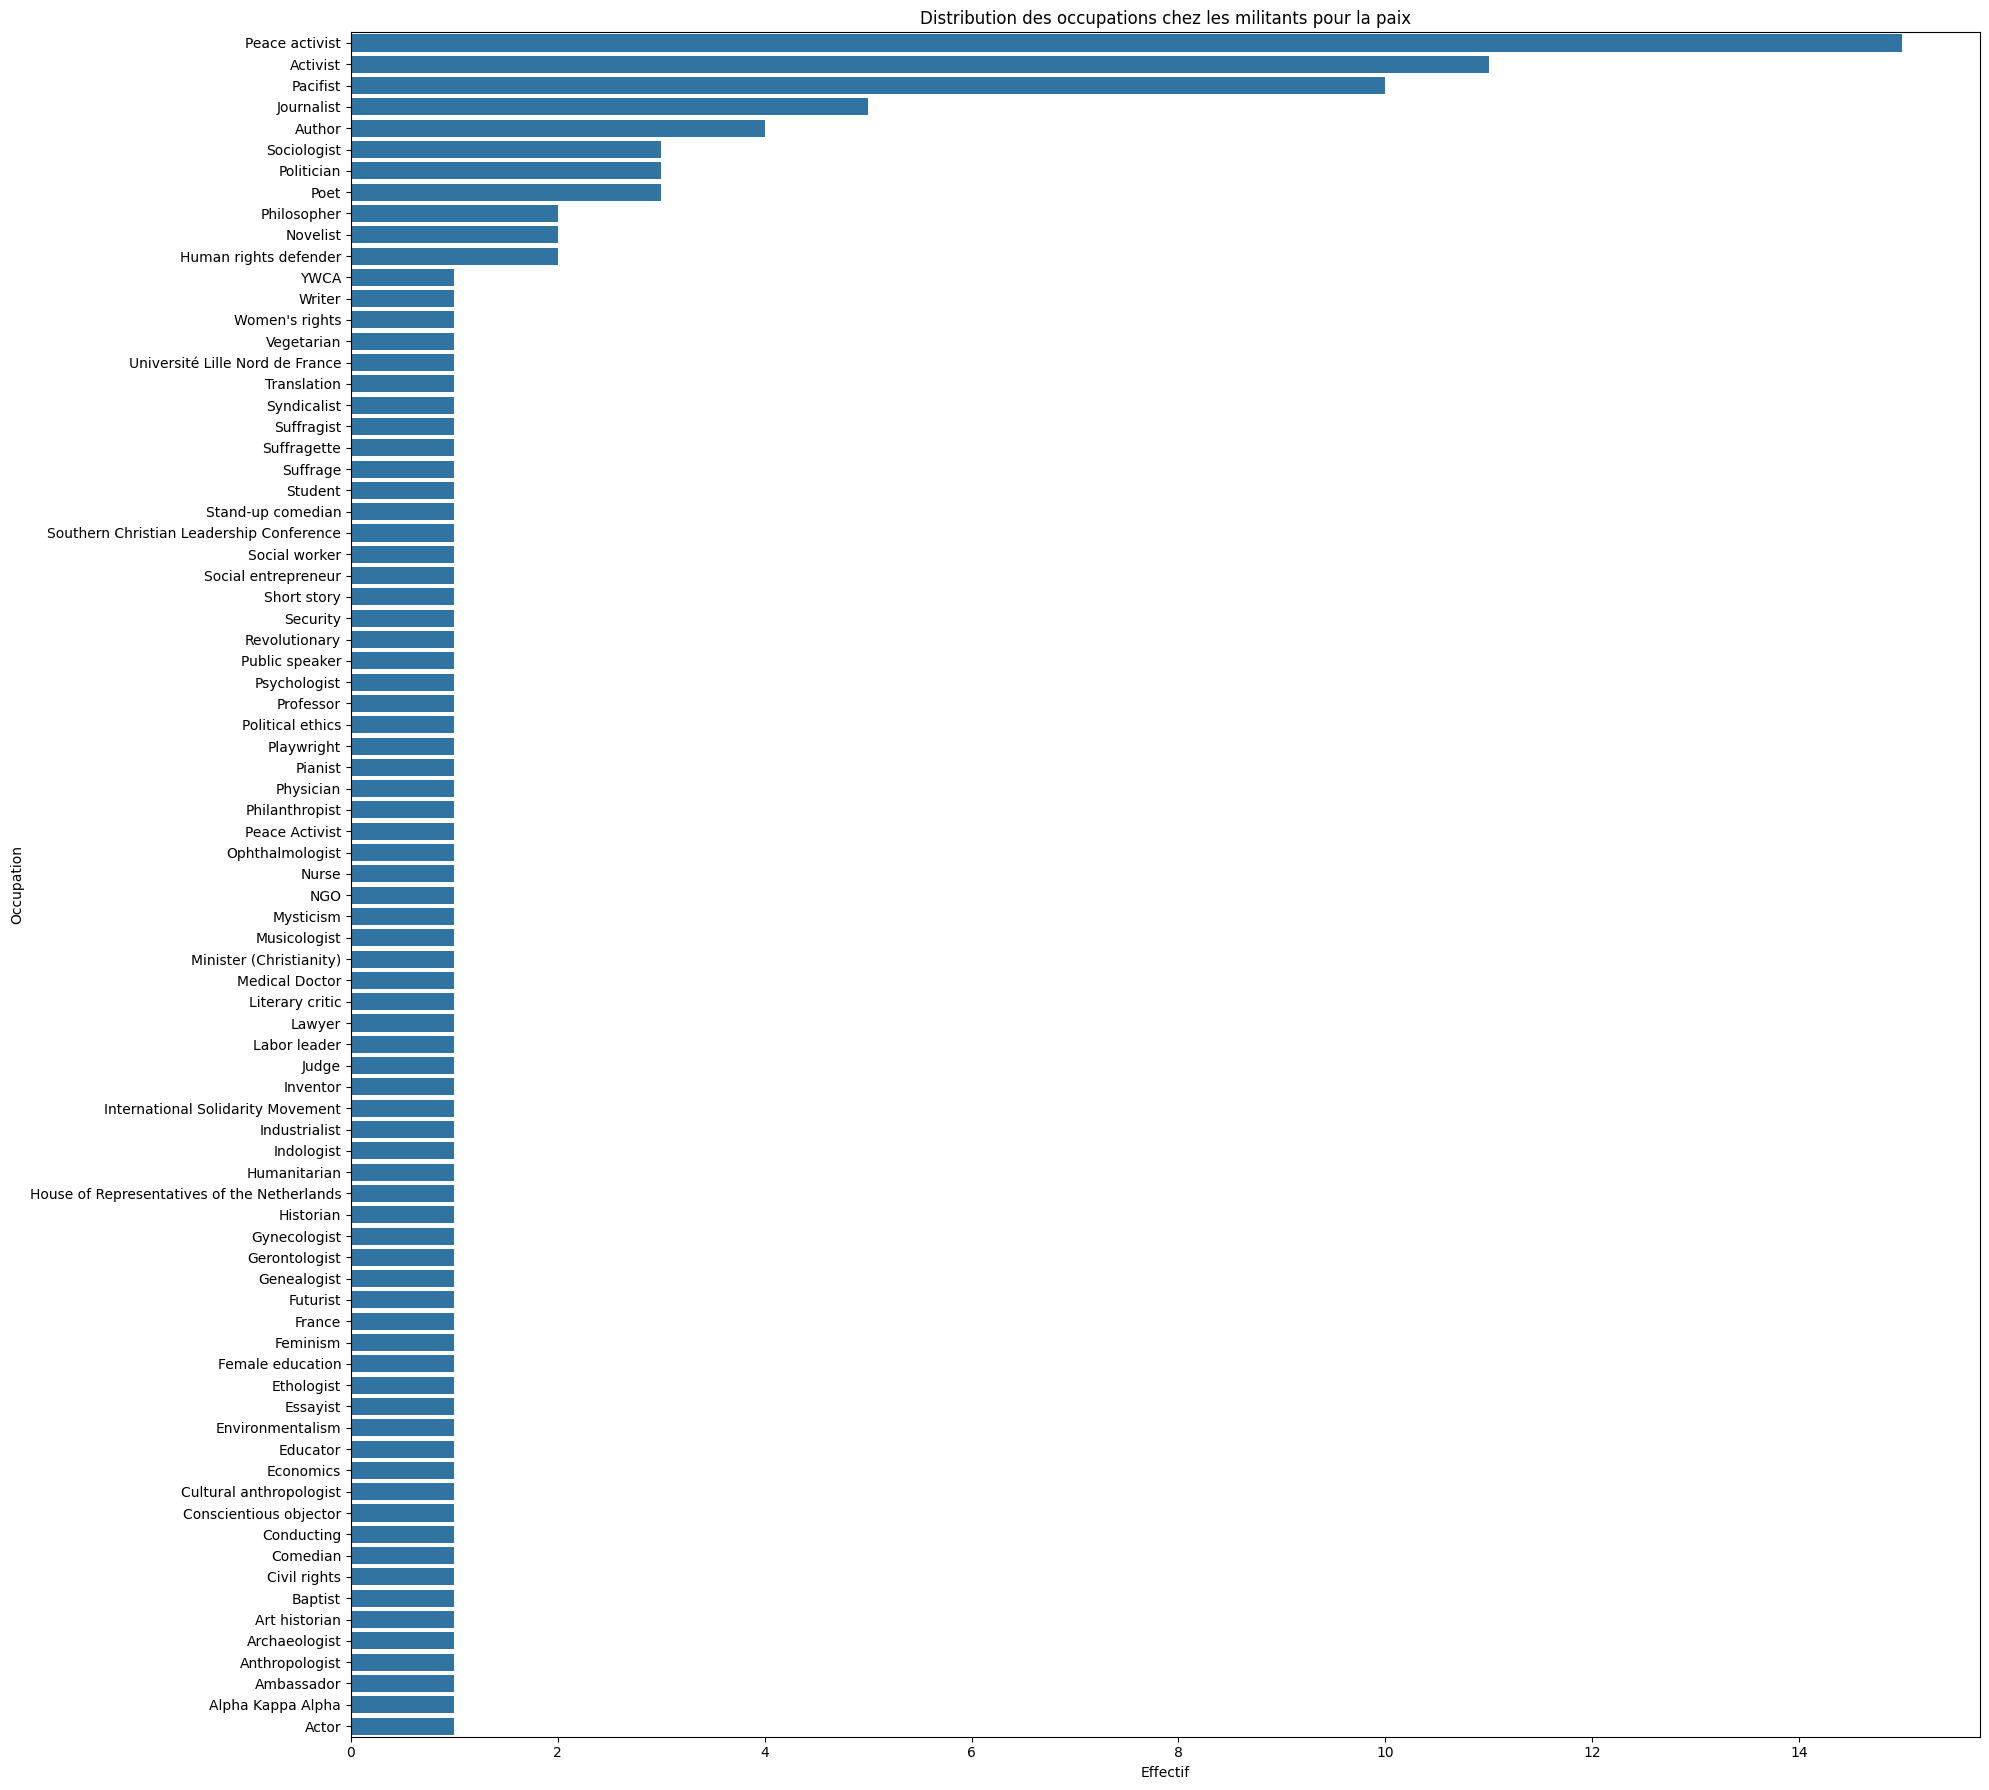

In [44]:
# Visualiser des occupations
plt.figure(figsize=(20, 18))
sns.barplot(x=df['occurrence'], y=df['name'])
plt.title("Distribution des occupations chez les militants pour la paix")
plt.xlabel("Effectif")
plt.ylabel("Occupation")
plt.tight_layout()

In [51]:
# Générer le nuage de mots
def generate_wordcloud(data):
    word_freq = dict(zip(df['name'], df['occurrence']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



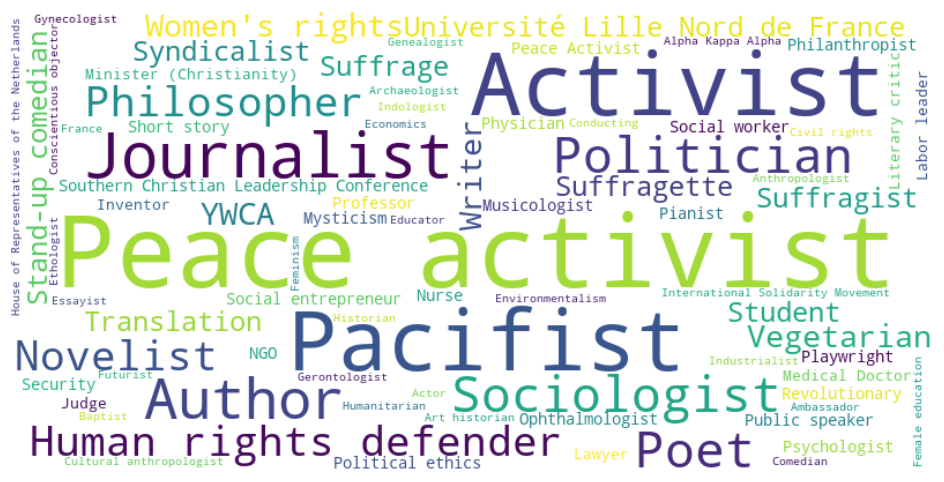

In [52]:
# Exécution du script
data = get_data()
generate_wordcloud(data)